# Try it !
<img src="https://raw.githubusercontent.com/euroargodev/argopy/master/docs/_static/argopy_logo_long.png" alt="argopy logo" width="200"/> 

**argopy** will manage for you all the complicated stuff of localising, downloading and formatting Argo data. Focus on your science !

So, simply import the ``argopy`` data fetcher:

In [1]:
from argopy import DataFetcher as ArgoDataFetcher

Then, get access to Argo data with 1 line of code:

In [2]:
ds = ArgoDataFetcher(src='erddap').region([14.3,29.5,54,65.8, 0, 100, '2023-01', '2025-04']).to_xarray()
#ds = ArgoDataFetcher.region([14.3,29.5,54,65.8, 0, 100, '2023-01', '2025-04']).to_xarray()

In this example, we used a data fetcher to get data for a given space/time region.  
We retrieved all Argo data measurements from 75W to 45W, 20N to 30N, 0db to 100db and from January to May 2011 (the max date is exclusive).  
Data are returned as a collection of measurements in a [xarray.Dataset](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.html).

In [3]:
ds
# floats

<xarray.Dataset> Size: 35MB
Dimensions:          (N_POINTS: 288581)
Coordinates:
    LATITUDE         (N_POINTS) float64 2MB 62.73 62.73 62.73 ... 54.76 54.76
    LONGITUDE        (N_POINTS) float64 2MB 19.86 19.86 19.86 ... 15.79 15.79
    TIME             (N_POINTS) datetime64[ns] 2MB 2023-01-01T02:08:40 ... 20...
  * N_POINTS         (N_POINTS) int64 2MB 0 1 2 3 ... 288578 288579 288580
Data variables: (12/15)
    CYCLE_NUMBER     (N_POINTS) int64 2MB 261 261 261 261 ... 147 147 147 147
    DATA_MODE        (N_POINTS) <U1 1MB 'A' 'A' 'A' 'A' 'A' ... 'R' 'R' 'R' 'R'
    DIRECTION        (N_POINTS) <U1 1MB 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_POINTS) int64 2MB 6903710 6903710 ... 7902194 7902194
    POSITION_QC      (N_POINTS) int64 2MB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PRES             (N_POINTS) float32 1MB 1.3 2.7 4.4 6.4 ... 60.1 60.9 61.8
    ...               ...
    PSAL_ERROR       (N_POINTS) float32 1MB nan nan nan nan ... nan nan nan nan
    PSAL_QC          (N_POINTS) int64 2MB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TEMP             (N_POINTS) float32 1MB 2.333 2.337 2.33 ... 8.871 8.867
    TEMP_ERROR       (N_POINTS) float32 1MB nan nan nan nan ... nan nan nan nan
    TEMP_QC          (N_POINTS) int64 2MB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TIME_QC          (N_POINTS) int64 2MB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         erddap.ifremer.fr
    Fetched_by:           jte
    Fetched_date:         2025/07/18
    Fetched_constraints:  [x=14.30/29.50; y=54.00/65.80; z=0.0/100.0; t=2023-...
    Fetched_uri:          https://erddap.ifremer.fr/erddap/tabledap/ArgoFloat...
    Processing_history:   [PRES,TEMP,PSAL] real-time and adjusted/delayed var...

Fetched data are returned as a 1D array collection of measurements. 

If you prefer to work with a 2D array collection of vertical profiles, simply transform the dataset with the [xarray.Dataset](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.html) accessor method [argo.point2profile](https://argopy.readthedocs.io/en/latest/api.html#argopy.ArgoAccessor.point2profile):

In [4]:
#print(ds)
platform_numbers = ds['PLATFORM_NUMBER'].values
print(platform_numbers)




[6903710 6903710 6903710 ... 7902194 7902194 7902194]


In [5]:
import numpy as np

unique_platform_numbers = np.unique(ds['PLATFORM_NUMBER'].values)
print(unique_platform_numbers)

import pandas as pd
import numpy as np

# Convert TIME to a pandas datetime object
time_values = pd.to_datetime(ds['TIME'].values)

# Get the most recent timestamp for each PLATFORM_NUMBER
platform_numbers = ds['PLATFORM_NUMBER'].values
unique_platform_numbers = np.unique(platform_numbers)

recent_activity = {}
for platform in unique_platform_numbers:
    # Filter data for the current platform
    platform_mask = platform_numbers == platform
    platform_times = time_values[platform_mask]
    
    # Get the most recent timestamp
    recent_activity[platform] = platform_times.max()

# Print floats with recent activity
for platform, last_time in recent_activity.items():
    print(f"Platform {platform} last reported data on {last_time}")

# sort the platforms by the most recent timestamp
sorted_platforms = sorted(recent_activity.items(), key=lambda x: x[1], reverse=True)
# Print sorted platforms
print("\nSorted platforms by most recent activity:")
for platform, last_time in sorted_platforms:
    print(f"Platform {platform} last reported data on {last_time}")

[1902682 1902683 2903899 2903902 2903908 3902110 3902115 3902117 3902488
 3902531 3902579 3902607 4903714 4903784 4903797 6903708 6903710 6903711
 6904243 7900584 7901091 7902171 7902194]
Platform 1902682 last reported data on 2024-02-23 19:25:00
Platform 1902683 last reported data on 2025-03-30 23:46:06
Platform 2903899 last reported data on 2024-10-05 23:27:57
Platform 2903902 last reported data on 2025-02-17 03:03:26
Platform 2903908 last reported data on 2025-03-08 08:09:00
Platform 3902110 last reported data on 2023-05-21 08:21:30
Platform 3902115 last reported data on 2023-02-22 08:15:30
Platform 3902117 last reported data on 2024-02-24 06:20:30
Platform 3902488 last reported data on 2023-04-10 22:43:02
Platform 3902531 last reported data on 2023-07-08 16:37:37
Platform 3902579 last reported data on 2025-03-25 22:02:16
Platform 3902607 last reported data on 2025-03-28 08:18:00
Platform 4903714 last reported data on 2023-09-27 21:15:10
Platform 4903784 last reported data on 2025-0

all_floats

You can also fetch data for a specific float using its [WMO number](<https://www.wmo.int/pages/prog/amp/mmop/wmo-number-rules.html):

In [6]:


f = ArgoDataFetcher().float(7900584)

f.to_xarray()



<xarray.Dataset> Size: 385kB
Dimensions:          (N_POINTS: 3205)
Coordinates:
    LATITUDE         (N_POINTS) float64 26kB 55.67 55.67 55.67 ... 58.34 58.34
    LONGITUDE        (N_POINTS) float64 26kB 15.13 15.13 15.13 ... 21.48 21.48
    TIME             (N_POINTS) datetime64[ns] 26kB 2023-07-10T10:21:31 ... 2...
  * N_POINTS         (N_POINTS) int64 26kB 0 1 2 3 4 ... 3201 3202 3203 3204
Data variables: (12/15)
    CYCLE_NUMBER     (N_POINTS) int64 26kB 1 1 1 1 1 1 ... 170 170 170 170 170
    DATA_MODE        (N_POINTS) <U1 13kB 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    DIRECTION        (N_POINTS) <U1 13kB 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_POINTS) int64 26kB 7900584 7900584 ... 7900584 7900584
    POSITION_QC      (N_POINTS) int64 26kB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PRES             (N_POINTS) float32 13kB 0.73 2.88 4.12 ... 35.8 36.07 36.54
    ...               ...
    PSAL_ERROR       (N_POINTS) float32 13kB nan nan nan nan ... nan nan nan nan
    PSAL_QC          (N_POINTS) int64 26kB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TEMP             (N_POINTS) float32 13kB 18.31 18.29 18.02 ... 13.63 13.22
    TEMP_ERROR       (N_POINTS) float32 13kB nan nan nan nan ... nan nan nan nan
    TEMP_QC          (N_POINTS) int64 26kB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TIME_QC          (N_POINTS) int64 26kB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         erddap.ifremer.fr
    Fetched_by:           jte
    Fetched_date:         2025/07/18
    Fetched_constraints:  WMO7900584
    Fetched_uri:          https://erddap.ifremer.fr/erddap/tabledap/ArgoFloat...
    Processing_history:   [PRES,TEMP,PSAL] real-time and adjusted/delayed var...

and in this case, you can visualise float data without download:

In [7]:
f.dashboard()

or for a float profile using the cycle number:

In [8]:
ArgoDataFetcher().profile(6902755, 12).to_xarray()

<xarray.Dataset> Size: 13kB
Dimensions:          (N_POINTS: 107)
Coordinates:
    LATITUDE         (N_POINTS) float64 856B 63.68 63.68 63.68 ... 63.68 63.68
    LONGITUDE        (N_POINTS) float64 856B -28.81 -28.81 ... -28.81 -28.81
    TIME             (N_POINTS) datetime64[ns] 856B 2018-10-19T23:52:00 ... 2...
  * N_POINTS         (N_POINTS) int64 856B 0 1 2 3 4 5 ... 102 103 104 105 106
Data variables: (12/15)
    CYCLE_NUMBER     (N_POINTS) int64 856B 12 12 12 12 12 12 ... 12 12 12 12 12
    DATA_MODE        (N_POINTS) <U1 428B 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION        (N_POINTS) <U1 428B 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_POINTS) int64 856B 6902755 6902755 ... 6902755 6902755
    POSITION_QC      (N_POINTS) int64 856B 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PRES             (N_POINTS) float32 428B 3.0 4.0 5.0 ... 1.713e+03 1.732e+03
    ...               ...
    PSAL_ERROR       (N_POINTS) float32 428B 0.01 0.01 0.01 ... 0.01 0.01 0.01
    PSAL_QC          (N_POINTS) int64 856B 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TEMP             (N_POINTS) float32 428B 7.598 7.599 7.602 ... 3.549 3.536
    TEMP_ERROR       (N_POINTS) float32 428B 0.002 0.002 0.002 ... 0.002 0.002
    TEMP_QC          (N_POINTS) int64 856B 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TIME_QC          (N_POINTS) int64 856B 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         erddap.ifremer.fr
    Fetched_by:           jte
    Fetched_date:         2025/07/18
    Fetched_constraints:  WMO6902755_CYC12
    Fetched_uri:          https://erddap.ifremer.fr/erddap/tabledap/ArgoFloat...
    Processing_history:   [PRES,TEMP,PSAL] real-time and adjusted/delayed var...

and finally, if you want to work with data interpolated on the same vertical levels (in pressure), than you can simply do it as well like:

In [9]:
import numpy as np
ds = ArgoDataFetcher().float(6902746).to_xarray()
ds = ds.argo.point2profile()
ds

<xarray.Dataset> Size: 221kB
Dimensions:          (N_PROF: 118, N_LEVELS: 110)
Coordinates:
  * N_PROF           (N_PROF) int64 944B 0 1 2 3 4 5 ... 112 113 114 115 116 117
  * N_LEVELS         (N_LEVELS) int64 880B 0 1 2 3 4 5 ... 105 106 107 108 109
    LATITUDE         (N_PROF) float64 944B 20.08 20.13 20.21 ... 16.17 16.67
    LONGITUDE        (N_PROF) float64 944B -60.17 -60.14 ... -76.05 -77.13
    TIME             (N_PROF) datetime64[ns] 944B 2017-07-06T14:49:00 ... 202...
Data variables: (12/15)
    CYCLE_NUMBER     (N_PROF) int64 944B 1 1 2 3 4 5 ... 112 113 114 115 116 117
    DATA_MODE        (N_PROF) <U1 472B 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION        (N_PROF) <U1 472B 'D' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_PROF) int64 944B 6902746 6902746 ... 6902746 6902746
    POSITION_QC      (N_PROF) int64 944B 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PRES             (N_PROF, N_LEVELS) float32 52kB 9.0 14.0 24.0 ... nan nan
    ...               ...
    PSAL_ERROR       (N_PROF, N_LEVELS) float32 52kB 0.01003 0.01003 ... nan nan
    PSAL_QC          (N_PROF) int64 944B 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TEMP             (N_PROF, N_LEVELS) float32 52kB 28.04 28.03 ... nan nan
    TEMP_ERROR       (N_PROF) float32 472B 0.002 0.002 0.002 ... 0.002 0.002
    TEMP_QC          (N_PROF) int64 944B 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TIME_QC          (N_PROF) int64 944B 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         erddap.ifremer.fr
    Fetched_by:           jte
    Fetched_date:         2025/07/18
    Fetched_constraints:  WMO6902746
    Fetched_uri:          https://erddap.ifremer.fr/erddap/tabledap/ArgoFloat...
    Processing_history:   [PRES,TEMP,PSAL] real-time and adjusted/delayed var...

In [10]:
ds.argo.interp_std_levels(np.arange(0,1000,10))

<xarray.Dataset> Size: 146kB
Dimensions:            (N_PROF: 116, PRES_INTERPOLATED: 100)
Coordinates:
    LATITUDE           (N_PROF) float64 928B 20.13 20.21 20.16 ... 16.17 16.67
    LONGITUDE          (N_PROF) float64 928B -60.14 -59.99 ... -76.05 -77.13
    TIME               (N_PROF) datetime64[ns] 928B 2017-07-08T06:49:00 ... 2...
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 800B 0 10 20 30 ... 970 980 990
  * N_PROF             (N_PROF) int64 928B 1 2 3 4 5 6 ... 113 114 115 116 117
Data variables:
    CYCLE_NUMBER       (N_PROF) int64 928B 1 2 3 4 5 6 ... 113 114 115 116 117
    DATA_MODE          (N_PROF) <U1 464B 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION          (N_PROF) <U1 464B 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER    (N_PROF) int64 928B 6902746 6902746 ... 6902746 6902746
    PRES               (N_PROF, PRES_INTERPOLATED) float32 46kB 3.0 ... 990.0
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 46kB 35.89 ... 34.92
    TEMP               (N_PROF, PRES_INTERPOLATED) float32 46kB 27.97 ... 5.429
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         erddap.ifremer.fr
    Fetched_by:           jte
    Fetched_date:         2025/07/18
    Fetched_constraints:  WMO6902746
    Fetched_uri:          https://erddap.ifremer.fr/erddap/tabledap/ArgoFloat...
    Processing_history:   [PRES,TEMP,PSAL] real-time and adjusted/delayed var...

don't forget that if you prefer to work with Pandas dataframe, it is as simple as:

In [11]:
ds.to_dataframe()

CYCLE_NUMBER DATA_MODE DIRECTION  PLATFORM_NUMBER  \
N_PROF N_LEVELS                                                      
0      0                    1         D         D          6902746   
       1                    1         D         D          6902746   
       2                    1         D         D          6902746   
       3                    1         D         D          6902746   
       4                    1         D         D          6902746   
...                       ...       ...       ...              ...   
117    105                117         D         A          6902746   
       106                117         D         A          6902746   
       107                117         D         A          6902746   
       108                117         D         A          6902746   
       109                117         D         A          6902746   

                 POSITION_QC  PRES  PRES_ERROR  PRES_QC       PSAL  \
N_PROF N_LEVELS                                                      
0      0                   1   9.0         2.4        1  36.056000   
       1                   1  14.0         2.4        1  36.056000   
       2                   1  24.0         2.4        1  36.057999   
       3                   1  34.0         2.4        1  36.507000   
       4                   1  45.0         2.4        1  36.928001   
...                      ...   ...         ...      ...        ...   
117    105                 1   NaN         2.4        1        NaN   
       106                 1   NaN         2.4        1        NaN   
       107                 1   NaN         2.4        1        NaN   
       108                 1   NaN         2.4        1        NaN   
       109                 1   NaN         2.4        1        NaN   

                 PSAL_ERROR  PSAL_QC       TEMP  TEMP_ERROR  TEMP_QC  TIME_QC  \
N_PROF N_LEVELS                                                                 
0      0            0.01003        1  28.038000       0.002        1        1   
       1            0.01003        1  28.034000       0.002        1        1   
       2            0.01003        1  28.018999       0.002        1        1   
       3            0.01016        1  27.701000       0.002        1        1   
       4            0.01026        1  26.867001       0.002        1        1   
...                     ...      ...        ...         ...      ...      ...   
117    105              NaN        1        NaN       0.002        1        1   
       106              NaN        1        NaN       0.002        1        1   
       107              NaN        1        NaN       0.002        1        1   
       108              NaN        1        NaN       0.002        1        1   
       109              NaN        1        NaN       0.002        1        1   

                 LATITUDE  LONGITUDE                TIME  
N_PROF N_LEVELS                                           
0      0           20.079    -60.173 2017-07-06 14:49:00  
       1           20.079    -60.173 2017-07-06 14:49:00  
       2           20.079    -60.173 2017-07-06 14:49:00  
       3           20.079    -60.173 2017-07-06 14:49:00  
       4           20.079    -60.173 2017-07-06 14:49:00  
...                   ...        ...                 ...  
117    105         16.666    -77.126 2020-01-09 07:31:00  
       106         16.666    -77.126 2020-01-09 07:31:00  
       107         16.666    -77.126 2020-01-09 07:31:00  
       108         16.666    -77.126 2020-01-09 07:31:00  
       109         16.666    -77.126 2020-01-09 07:31:00  

[12980 rows x 18 columns]

/home/jte/.local/lib/python3.10/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/jte/.local/lib/python3.10/site-packages/scipy/interpolate/_interpolate.py:710: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


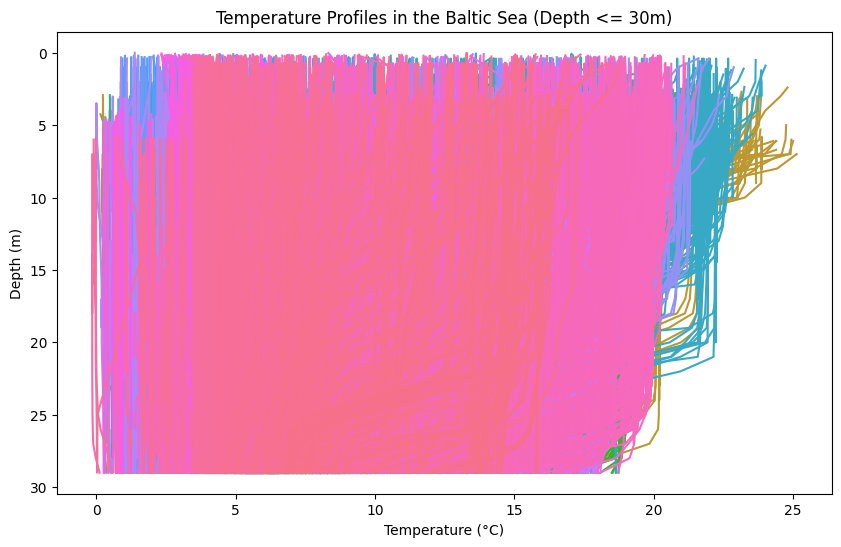

In [14]:
import np as np
from argopy import DataFetcher as ArgoDataFetcher


# Fetch data for the Baltic Sea region with a depth limit of 30 meters
ds = ArgoDataFetcher().region([14.3, 29.5, 54, 65.8, 0, 30]).to_xarray()

# Transform the data into profiles
ds = ds.argo.point2profile()

# Interpolate the data to standard levels (e.g., every 1 meter up to 30 meters)
ds = ds.argo.interp_std_levels(np.arange(0, 30, 1))

# Convert the data to a Pandas DataFrame
df = ds.to_dataframe()

# Visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plot temperature profiles
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='TEMP', y='PRES', hue='TIME', legend=None)
plt.gca().invert_yaxis()  # Invert y-axis for depth
plt.title('Temperature Profiles in the Baltic Sea (Depth <= 30m)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (m)')
plt.show()
